# Dati energetici

In [1]:
import matplotlib.pyplot as plt

from dataset import facilities_positions, instances
from dataset.data import *

%matplotlib inline

In [2]:
inst = INSTANCES['B'][24][1]  # Istanza a caso
T = range(24)

In [3]:
instance = instances.load_data(inst)
C = instance['C'][0]

## Dati energetici 1

$$
\gamma = \frac{C_k}{2}
$$
$$
G_k = e_k^t = \gamma
$$
$$
c_k^t = 1
$$

In [4]:
instance1 = instances.load_energy_data_1(inst)

In [5]:
γ = instance1['G'][0]

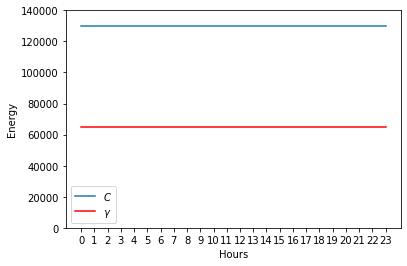

In [6]:
plt.plot([C for _ in T], label=r'$C$')
plt.plot([γ for _ in T], label=r'$\gamma$', color='r')
plt.xticks(T)
plt.ylim(0, 140000)
plt.xlabel('Hours')
plt.ylabel('Energy')
plt.legend()
plt.show()

## Dati energetici 2

$$
\delta = \frac{\sum_{i \in A} \sum_{t \in T} d_i^t}{|T||K|}
$$
$$
G_k = e^t_k = \delta
$$

In [7]:
instance2 = instances.load_energy_data_2(inst)

In [8]:
δ = instance2['G'][0]
assert instance2['G'][0] == instance2['e'][0][0]

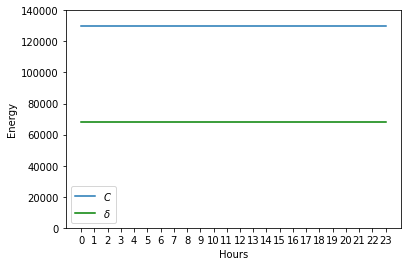

In [9]:
plt.plot([C for _ in T], label=r'$C$')
plt.plot([δ for _ in T], label=r'$\delta$', color='g')
plt.xticks(T)
plt.ylim(0, 140000)
plt.xlabel('Hours')
plt.ylabel('Energy')
plt.legend()
plt.show()

## Confronto dati energetici 1 e 2

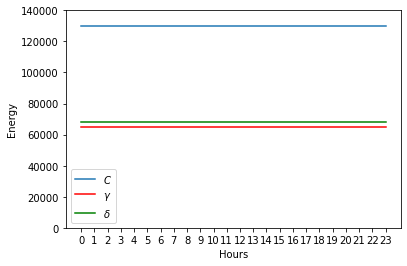

In [10]:
plt.plot([C for _ in T], label=r'$C$')
plt.plot([γ for _ in T], label=r'$\gamma$', color='r')
plt.plot([δ for _ in T], label=r'$\delta$', color='g')
plt.xticks(T)
plt.ylim(0, 140000)
plt.xlabel('Hours')
plt.ylabel('Energy')
plt.legend()
plt.show()

In [11]:
δ - γ

3093.4155833339028

## Dati energetici basati sulla distanza dal centro

$$
e_k^t = P_k r_k^t
$$
$$
c_k^t = 1
$$

dove $r$ indica l'irraggiamento e

$$
P_k = \mu \operatorname{f}(k)
$$

La funzione $\operatorname{f}$ può essere:

- *costante*:

$$
\operatorname{f_C}(k) = 1
$$

- *lineare*:

$$
\operatorname{f_L}(k) = \frac{\operatorname{d}(k, C)}{\max_{k}{\operatorname{d}(k, C)}}
$$

- *quadratica*:

$$
\operatorname{f_Q}(k) = \frac{{\operatorname{d}(k, C)}^2}{{\max_{k}{\operatorname{d}(k, C)}}^2}
$$

- *esponenziale*:

$$
\operatorname{f_E}(k) = \frac{e^{\operatorname{d}(k, C)}}{e^{\max_{k}{\operatorname{d}(k, C)}}}
$$

La costante $\mu$ viene calcolata facendo in modo che l'energia totale prodotta sia la stessa di quella prodotta usando i dati energetici 1 o 2:

$$
\mu \sum_{t \in T} \sum_{k \in K} \operatorname{f}(k) r_k^t = \lambda
$$
$$
\mu = \frac{\lambda}{\sum_{t \in T} \sum_{k \in K} \operatorname{f}(k) r_k^t}
$$

dove $\lambda$ è l'energia totale prodotta nei dati di riferimento.

In [12]:
month = 7  # July
energy_ref = 2

μC, instanceC = instances.load_energy_data_distances(inst, month, 'constant', energy_ref)
μL, instanceL = instances.load_energy_data_distances(inst, month, 'linear', energy_ref)
μQ, instanceQ = instances.load_energy_data_distances(inst, month, 'quadratic', energy_ref)

In [13]:
μC, μL, μQ

(223.61592440547417, 404.90374978378503, 564.409591147029)

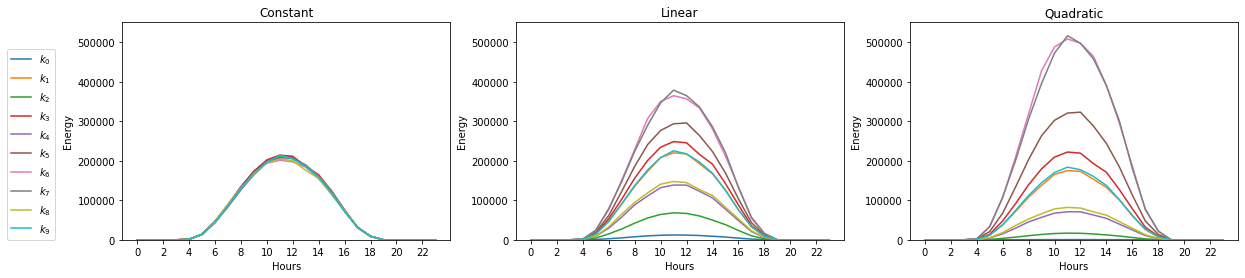

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
plt.setp(axes, xticks=range(0, 24, 2), ylim=(0, 550000))

for k in range(10):
    plt.sca(axes[0])
    plt.plot(instanceC['e'][k], label='$k_{}$'.format(k))
    plt.title('Constant')
    plt.xlabel('Hours')
    plt.ylabel('Energy')

    plt.sca(axes[1])
    plt.plot(instanceL['e'][k], label='$k_{}$'.format(k))
    plt.title('Linear')
    plt.xlabel('Hours')
    plt.ylabel('Energy')

    plt.sca(axes[2])
    plt.plot(instanceQ['e'][k], label='$k_{}$'.format(k))
    plt.title('Quadratic')
    plt.xlabel('Hours')
    plt.ylabel('Energy')

axes[0].legend(loc=(-.35, 0))
plt.show()

Posizione delle facility rispetto al centro $C$:

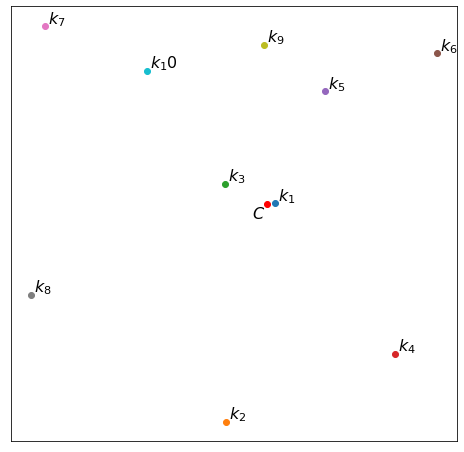

In [15]:
coords = facilities_positions.load_data(FACILITIES_COORDS)

center_x = CENTER[0]
center_y = CENTER[1]

plt.figure(figsize=(8, 8))
plt.rc('font', size=16)

for i, coord in enumerate(coords):
    x, y = coord
    plt.plot((x,), (y,), 'o')
    plt.text(x+500, y+300, '$k_{}$'.format(i+1))
plt.plot((center_x,), (center_y,), 'o', color='r')
plt.text(center_x-2500, center_y-1500, '$C$')
plt.xticks([])
plt.yticks([])
plt.show()